# Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

With [provided data](https://www.kaggle.com/washingtonpost/police-shootings) I will try to explore list of issues that follow police brutality. Especially I will try to concentrate on racial discrimination and find if it has impact in such cruelty. In the end I will try prupose a plan on how to tackle these found issues.

## Getting familiar with data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy.spatial import distance
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import time

!pip install geopy
from geopy.geocoders import Nominatim
! pip install kneed
from kneed import KneeLocator

In [2]:
# Importing dataframes
url_shootings = 'https://drive.google.com/file/d/1-FhoP1nAWbkkABCQyNVu_txENFbbd7sg/view?usp=sharing'
path_shootings = 'https://drive.google.com/uc?export=download&id='+url_shootings.split('/')[-2]
df_shootings = pd.read_csv(path_shootings, encoding='cp1252')

url_full_shootings = 'https://drive.google.com/file/d/1egh3vIw-EopOEs--ZXLIXWe6V0ioyAAT/view?usp=sharing'
path_full_shootings = 'https://drive.google.com/uc?export=download&id='+ url_full_shootings.split('/')[-2]
df_full_shootings = pd.read_csv(path_full_shootings, encoding='cp1252')

url_17_populiation = 'https://drive.google.com/file/d/1LAEo7YKw0AyaoMa0192S9cDq_508e_4C/view?usp=sharing'
path_17_populiation = 'https://drive.google.com/uc?export=download&id='+url_17_populiation.split('/')[-2]
df_17_populiation = pd.read_csv(path_17_populiation, encoding='cp1252')

df_populiation = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')

In [6]:
df_shootings

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,2382,James Leroy Marker,2017-02-26,shot,gun,66.0,M,W,Floral City,FL,False,other,Car,False
2138,2378,Joey J. Bridges,2017-02-27,shot,gun,27.0,M,W,Shelby,NC,True,attack,Foot,False
2139,2391,Shawn M. Igers,2017-02-27,shot,gun,40.0,M,W,Corning,WI,False,attack,Not fleeing,False
2140,2393,Earl Riley,2017-02-28,shot,gun,25.0,M,B,Houston,TX,False,attack,Not fleeing,False


In [3]:
# Convert "date" column into pandas datetime
df_shootings["date"] = pd.to_datetime(df_shootings["date"])
df_shootings = df_shootings.set_index("date")

In [4]:
# Getting up to date data
df_full_shootings["date"] = pd.to_datetime(df_full_shootings["date"])
df_full_shootings = df_full_shootings.set_index("date")
df_full_shootings

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
date,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-15,6613,NaN,shot,undetermined,50.0,M,NaN,Rexburg,ID,False,undetermined,NaN,False,-111.793,43.817,True
2021-02-15,6614,NaN,shot,undetermined,NaN,M,NaN,El Monte,CA,False,undetermined,Foot,False,-118.011,34.064,True
2021-02-15,6615,Royce Robertson,shot,gun,33.0,M,W,Indian Wells,CA,False,other,Car,False,-116.292,33.712,True


In [ ]:
df_shootings.describe()

,id,age
count,2142.00000,2099.000000
mean,1232.21662,36.484516
std,670.62817,12.874000
min,3.00000,6.000000
25%,664.50000,26.000000
50%,1231.50000,34.000000
75%,1811.75000,45.000000
max,2394.00000,86.000000


In [ ]:
df_shootings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2142 entries, 2015-01-02 to 2017-02-28
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   manner_of_death          2142 non-null   object 
 3   armed                    2136 non-null   object 
 4   age                      2099 non-null   float64
 5   gender                   2141 non-null   object 
 6   race                     2039 non-null   object 
 7   city                     2142 non-null   object 
 8   state                    2142 non-null   object 
 9   signs_of_mental_illness  2142 non-null   bool   
 10  threat_level             2142 non-null   object 
 11  flee                     2106 non-null   object 
 12  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 20

In [ ]:
df_shootings["armed"].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'pole and knife'], dtype=o

## Investigating data 

In [5]:
# Encoding race variable
df_shootings_racial = df_shootings[["id","city","state","race"]]

race = ["Asian","White","Hispanic","Black","Other","Unknown","Native American"]
race_short = ['A', 'W', 'H', 'B', 'O', "nan", 'N']

for r,s in zip(race,race_short):
  if s == "nan":
    df_shootings_racial[r] = (df_shootings_racial['race'].isna()).astype(float)
  else:  
    df_shootings_racial[r] = (df_shootings_racial['race'] == s).astype(float)
df_shootings_racial

,id,city,state,race,Asian,White,Hispanic,Black,Other,Unknown,Native American
date,,,,,,,,,,,
2015-01-02,3,Shelton,WA,A,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,4,Aloha,OR,W,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,5,Wichita,KS,H,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-04,8,San Francisco,CA,W,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,9,Evans,CO,H,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-26,2382,Floral City,FL,W,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-02-27,2378,Shelby,NC,W,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-02-27,2391,Corning,WI,W,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Counting shootings
df_shootings_racial_count = df_shootings_racial.groupby('state').sum().reset_index()
df_shootings_racial_count["total_shootings"] = df_shootings_racial.groupby('state').count().reset_index()["id"]
df_shootings_racial_count = df_shootings_racial_count.sort_values("total_shootings",ascending = False).reset_index().drop(["index","id"],axis=1)
df_shootings_racial_count.head(10)

,state,Asian,White,Hispanic,Black,Other,Unknown,Native American,total_shootings
0,CA,14.0,103.0,145.0,60.0,8.0,25.0,0.0,355
1,TX,2.0,88.0,56.0,40.0,3.0,7.0,1.0,197
2,FL,1.0,61.0,16.0,44.0,2.0,5.0,0.0,129
3,AZ,0.0,48.0,30.0,4.0,0.0,5.0,8.0,95
4,OK,0.0,39.0,4.0,14.0,0.0,7.0,1.0,65
5,NC,1.0,34.0,2.0,27.0,0.0,1.0,0.0,65
6,CO,2.0,28.0,20.0,8.0,0.0,5.0,1.0,64
7,OH,2.0,31.0,0.0,26.0,2.0,2.0,0.0,63
8,GA,1.0,30.0,6.0,20.0,0.0,5.0,0.0,62
9,IL,0.0,16.0,6.0,32.0,0.0,0.0,0.0,54


In [154]:
# Visualize interactive plotly plot
df_shootings_racial_count["text"] = "White " + df_shootings_racial_count["White"].map(str) + '<br>' + \
    "Hispanic " + df_shootings_racial_count["Hispanic"].map(str) + '<br>' + \
    "Black " + df_shootings_racial_count["Black"].map(str) + '<br>' + \
    "Native American " + df_shootings_racial_count["Native American"].map(str) + '<br>' + \
    "Other " + df_shootings_racial_count["Other"].map(str) + '<br>' + \
    "Unknown " + df_shootings_racial_count["Unknown"].map(str)

fig = go.Figure(data=go.Choropleth(
    locations=df_shootings_racial_count["state"],
    z = df_shootings_racial_count["total_shootings"].astype(float), 
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Shootings",
    text =  df_shootings_racial_count["text"]  
))

fig.update_layout(
    title_text = 'State Police Fatal Shooting Counts 2015-2017 ',
    geo_scope='usa', 
)

fig.show()

**Observation**

* During 2015-2017 years California had the highest numbers of killings with more than double of third ranked Florida state count and had 158 more shootings than second place ranked Texas state count.




We can note that every state has unevenly distributed shootings along races. Let's check 2017 populiation data taken from [kff.org](https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?dataView=1&currentTimeframe=2&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D) and get better notion if certain races were shot more often than others.

In [71]:
df_17_populiation.head(5)

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total
0,United States,192336100,38408000.0,57560600,17651200.0,2039400.0,502500.0,8524700.0,317022500
1,Alabama,3119100,1259900.0,195700,63800.0,19800.0,NaN,81800.0,4741400
2,Alaska,433000,18000.0,47400,46600.0,95500.0,6300.0,63300.0,710100
3,Arizona,3761600,270200.0,2143400,220300.0,261300.0,12500.0,172000.0,6841300
4,Arkansas,2109200,434100.0,220300,48100.0,13500.0,7300.0,77500.0,2910000


In [7]:
abbrev_us_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
abbrev_us_state = dict(map(reversed, abbrev_us_state.items()))

In [8]:
dic_state_pop_ratio = {"State":[],"White_ratio":[],"Black_ratio":[],"Hispanic_ratio":[],"Asian_ratio":[],"Native_American_ratio":[]}

for s in df_shootings_racial_count["state"][:5]:
  row_bol = df_shootings_racial_count["state"] == s
  total_shootings =  df_shootings_racial_count[row_bol]["total_shootings"].values[0]
  df_state_pop = df_17_populiation[df_17_populiation["Location"] == abbrev_us_state[s]]
  dic_state_pop_ratio["State"].append(abbrev_us_state[s])
  dic_state_pop_ratio["White_ratio"].append(df_shootings_racial_count[row_bol]["White"].values[0]/df_state_pop["White"].values[0]*100000)
  dic_state_pop_ratio["Black_ratio"].append(df_shootings_racial_count[row_bol]["Black"].values[0]/df_state_pop["Black"].values[0]*100000)
  dic_state_pop_ratio["Hispanic_ratio"].append(df_shootings_racial_count[row_bol]["Hispanic"].values[0]/df_state_pop["Hispanic"].values[0]*100000)
  dic_state_pop_ratio["Asian_ratio"].append(df_shootings_racial_count[row_bol]["Asian"].values[0]/df_state_pop["Asian"].values[0]*100000)
  dic_state_pop_ratio["Native_American_ratio"].append(df_shootings_racial_count[row_bol]["Native American"].values[0]/
                                                      (df_state_pop["American Indian/Alaska Native"].values[0] +
                                                       df_state_pop["Native Hawaiian/Other Pacific Islander"].values[0])*100000
                                                      )

df_state_pop_ratio = pd.DataFrame.from_dict(dic_state_pop_ratio)
df_state_pop_ratio

,State,White_ratio,Black_ratio,Hispanic_ratio,Asian_ratio,Native_American_ratio
0,California,0.719993,2.910361,0.954299,0.250089,0.000000
1,Texas,0.761265,1.251369,0.511369,0.151826,1.135074
2,Florida,0.551602,1.420546,0.302297,0.174856,0.000000
3,Arizona,1.276053,1.480385,1.399645,0.000000,2.921841
4,Oklahoma,1.555396,5.327245,0.999500,0.000000,0.348675


Text(0, 0.5, 'Shootings Count per 100.000 people')

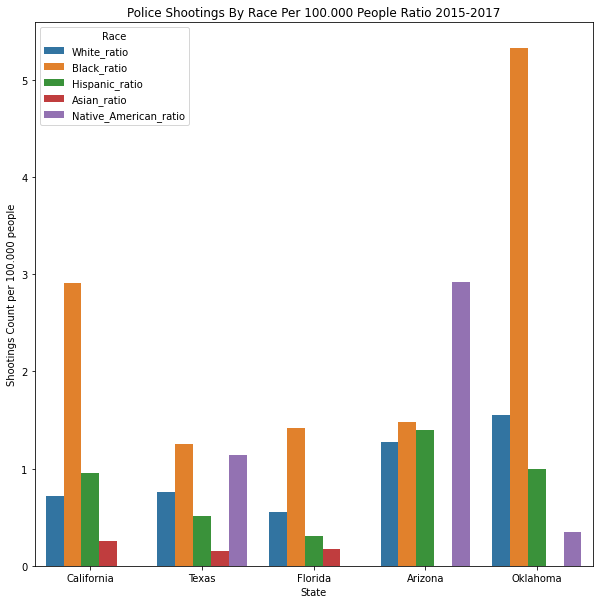

In [9]:
# Plot states shootings by race per 100.000 people ratio
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(data=df_state_pop_ratio.melt(id_vars="State").rename(columns=str.title), x="State", y="Value", hue="Variable", ax=ax)
plt.title("Police Shootings By Race Per 100.000 People Ratio 2015-2017")
plt.legend(title="Race")
plt.ylabel("Shootings Count per 100.000 people")

By very roughly comparing how many people were killed per 100.000 race population ratio we can see that black people were killed much more often. In California we see that black people were killed even 4 times more than white people.  Although maybe it's because black people tend to do more crimes ? \
Let's get 2015 US [populiation](https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/) data  with [crimes ](https://https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015/tables/table-43) data and check if black people were tend to make more crimes.

In [105]:
df_race_all_shot = df_shootings["2015-01-01":"2015-12-31"]
dic_race_pop = {"Population":["crimes","all","ratio per 100.000 people","shootings","shootings ratio per 100.000 people"],
                "Black or African American": [2197140,42530000,2197140/42530000 * 100000, 
                                              len(df_race_all_shot[df_race_all_shot["race"] == "B"]),
                                              len(df_race_all_shot[df_race_all_shot["race"] == "B"])/42530000 * 100000],
                "White":[5753212,247380000,5753212/247380000 * 100000,
                         len(df_race_all_shot[df_race_all_shot["race"] == "W"]),
                         len(df_race_all_shot[df_race_all_shot["race"] == "W"])/247380000 * 100000],                
                }
df_race_crimes_pop = pd.DataFrame(dic_race_pop) 
pd.set_option('float_format', '{:f}'.format)   
df_race_crimes_pop                        

,Population,Black or African American,White
0,crimes,2197140.000000,5753212.000000
1,all,42530000.000000,247380000.000000
2,ratio per 100.000 people,5166.094522,2325.657693
3,shootings,258.000000,495.000000
4,shootings ratio per 100.000 people,0.606631,0.200097


From the 2015 crime data numbers we can see that per 100.000 people Black or African American almost 2,2 times did more crimes than white people. Although overall we see that black people were shot 3 times more than white people. These numbers indicates that racial discrimination could have been a factor which led to these unevenly distributed brutal shootings.

----

Check top 10 states which has the biggest shootings counts per 100.000 people ratio over 2015-2017 years.

In [10]:
dic_state_pop_ratio_full = {"Population":[],"100000 per person ratio":[]}

df_shootings_racial_pop = df_shootings.groupby("state").count().reset_index()[["id","state"]]
for v,s in zip(df_shootings_racial_pop["id"].values, df_shootings_racial_pop["state"].values):
  if abbrev_us_state[s]:    
    pop_value = df_17_populiation[df_17_populiation["Location"] == abbrev_us_state[s]]["Total"].values[0]
    dic_state_pop_ratio_full["Population"].append(pop_value)
    dic_state_pop_ratio_full["100000 per person ratio"].append(v/pop_value*100000)

df_state_pop_ratio_full = pd.DataFrame.from_dict(dic_state_pop_ratio_full )
df_shootings_racial_pop = df_shootings_racial_pop.join(df_state_pop_ratio_full) 
df_shootings_racial_pop = df_shootings_racial_pop.rename(columns={"id":"Shootings"})
df_shootings_racial_pop = df_shootings_racial_pop.sort_values("100000 per person ratio", ascending=False)
df_shootings_racial_pop.head(10)

,Shootings,state,Population,100000 per person ratio
32,44,NM,2038200,2.158768
36,65,OK,3803700,1.708862
0,12,AK,710100,1.689903
7,10,DC,657600,1.520681
50,8,WY,563300,1.420202
49,25,WV,1762100,1.418762
3,95,AZ,6841300,1.388625
33,35,NV,2946600,1.187810
5,64,CO,5461100,1.171925
18,48,LA,4541500,1.056920


No handles with labels found to put in legend.


Text(0, 0.5, 'Shootings Count per 100.000 people')

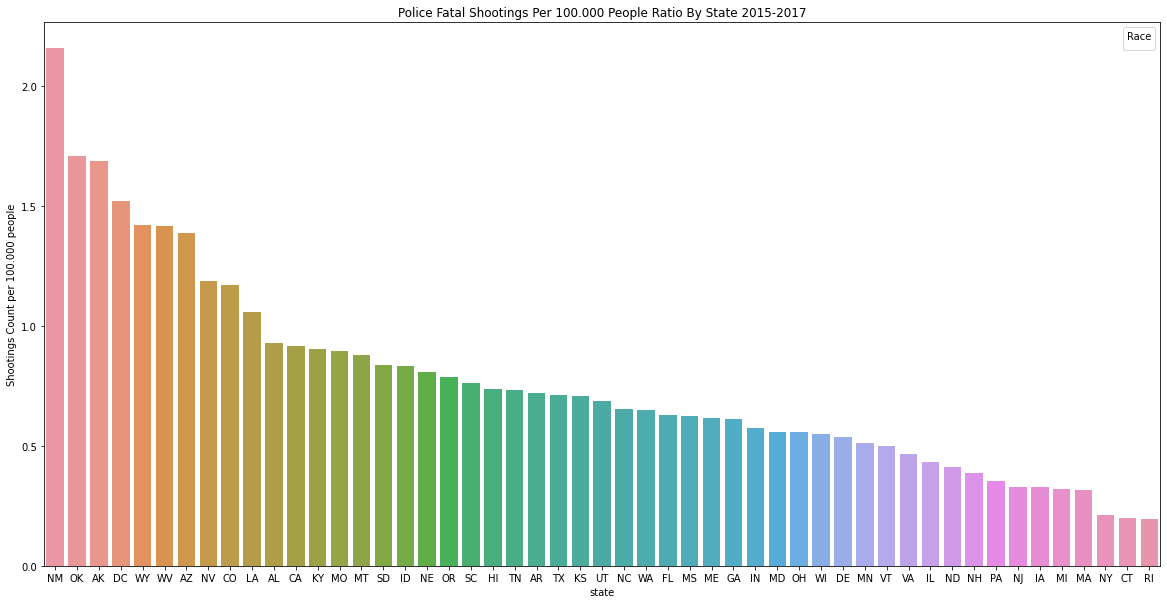

In [12]:
# Plot police fatal shootings per 100.000 people ratio by state
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=df_shootings_racial_pop, x="state", y="100000 per person ratio",ax=ax)

plt.title("Police Fatal Shootings Per 100.000 People Ratio By State 2015-2017")
plt.legend(title="Race")
plt.ylabel("Shootings Count per 100.000 people")

**Observation:**
- New Mexico has significant police fatal shootings ratio.

According to Maj. Tim Johnson, head of the New Mexico State Police investigations bureau, [saying](https://www.abqjournal.com/1266910/nm-ranks-no-1-for-fatal-police-shootings.html): \
*He believes the high rates of crime here have a lot to do with it. For the past several years, New Mexico has experienced increases in violent and property crime, and it was first or second for crime rates in 2016 and 2017.*


Even though New Mexico has significant crime rate, it has very weak [gun laws](https://www.washingtonpost.com/graphics/2017/national/assault-weapons-laws/#:~:text=California%20and%20Connecticut%20have%20the%20strictest%20firearm%20laws%20in%20the%20nation.,-OK&text=GA-,Virginia%20has%20two%20of%20the%20seven%20firearms%20laws%20and%20generally,restriction%20laws%20in%20the%20country.&text=Two%20states%20had%20none%20of,while%20two%20had%20all%20seven.) comparing with other states like California. In fact in third place standing Alaska has very weak gun laws and very high [crime rates](https://eu.usatoday.com/story/money/business/2016/07/29/americas-most-violent-and-peacefulstates/87658252/) as well.

----

Let's check how much police shootings varies across US cities.

In [150]:
df_shootings_racial_city_count = df_shootings_racial.groupby(["city"]).sum().reset_index()
df_shootings_racial_city_count["total_shootings"] = df_shootings_racial.groupby('city').count().reset_index()["id"]
df_shootings_racial_city_count = df_shootings_racial_city_count.sort_values("total_shootings",ascending = False).reset_index().drop(["index","id"],axis=1)[:50]
df_shootings_racial_city_count.head(10)

,city,Asian,White,Hispanic,Black,Other,Unknown,Native American,total_shootings
0,Los Angeles,1.0,4.0,16.0,9.0,0.0,1.0,0.0,31
1,Phoenix,0.0,10.0,8.0,1.0,0.0,2.0,3.0,24
2,Houston,1.0,3.0,5.0,14.0,0.0,0.0,1.0,24
3,Chicago,0.0,2.0,1.0,20.0,0.0,0.0,0.0,23
4,Las Vegas,0.0,8.0,4.0,3.0,0.0,1.0,0.0,16
5,Austin,0.0,13.0,1.0,2.0,0.0,0.0,0.0,16
6,Columbus,0.0,4.0,0.0,11.0,1.0,0.0,0.0,16
7,San Antonio,0.0,3.0,10.0,2.0,0.0,1.0,0.0,16
8,Miami,0.0,2.0,6.0,7.0,0.0,0.0,0.0,15
9,Tucson,0.0,3.0,9.0,1.0,0.0,0.0,0.0,13


In [151]:
# Getting longitude and latitude coordinates
time_start = time.time()
dic_cord = {"latitude":[],"longitude":[]}
for c in df_shootings_racial_city_count["city"].values:  
  geolocator = Nominatim(user_agent="my-application")
  location = geolocator.geocode(c)
  dic_cord["latitude"].append(location.latitude)
  dic_cord["longitude"].append(location.longitude) 

print('Calculating coordinates done! Time elapsed: {} seconds'.format(time.time()-time_start))

Calculating coordinates done! Time elapsed: 24.57785415649414 seconds


In [152]:
df_city_cords = pd.DataFrame.from_dict(dic_cord)
df_shootings_racial_city_count = df_shootings_racial_city_count.join(df_city_cords)

In [153]:
# Plot interactive plotly plot
df_shootings_racial_city_count["text"] = df_shootings_racial_city_count["city"] + '<br>' + \
    "Total Shootings " + df_shootings_racial_city_count["total_shootings"].map(str) + '<br>' + \
    "White " + df_shootings_racial_city_count["White"].map(str) + '<br>' + \
    "Hispanic " + df_shootings_racial_city_count["Hispanic"].map(str) + '<br>' + \
    "Black " + df_shootings_racial_city_count["Black"].map(str) + '<br>' + \
    "Native American " + df_shootings_racial_city_count["Native American"].map(str) + '<br>' + \
    "Other " + df_shootings_racial_city_count["Other"].map(str) + '<br>' + \
    "Unknown " + df_shootings_racial_city_count["Unknown"].map(str)


limits = [(0,2),(3,10),(11,20),(21,50)]
colors = ["red","crimson","orangered","orange"]
cities = []
scale = 20

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]    
    df_sub = df_shootings_racial_city_count[lim[0]:lim[1]]      
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub["longitude"],
        lat = df_sub["latitude"],
        text = df_sub["text"],
        marker = dict(
            size = df_sub["total_shootings"]*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(df_sub["total_shootings"][lim[0]],df_sub["total_shootings"][lim[1]-1])))
    

fig.update_layout(
        title_text = 'US top 50 ranked cities by police shootings 2015-2017',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

**Observation:**
- As we could expect most cities with highest shooting counts are located in the top police fatal shooting ranked states. Noticeably we could see a bit more scattered view, where some cities like Chicago pops out even though Illinois state wasn't highly ranked in police shootings.

----

Open 2014 US cities populiation data and check ratio between 2015 police shootings. Even though we know that it's not very accurate ratio representation we still can get approximate view of how much policy shootings  cities get per person.

In [14]:
# Clean up "name" strings by deleting empty space
df_populiation["name"] = df_populiation["name"].apply(lambda x: x.strip())
df_populiation.head(10)

,name,pop,lat,lon
0,New York,8287238,40.730599,-73.986581
1,Los Angeles,3826423,34.053717,-118.242727
2,Chicago,2705627,41.875555,-87.624421
3,Houston,2129784,29.758938,-95.367697
4,Philadelphia,1539313,39.952335,-75.163789
5,Phoenix,1465114,33.446768,-112.075672
6,San Antonio,1359174,29.424600,-98.495141
7,San Diego,1321016,32.717421,-117.162771
8,Dallas,1219399,32.776196,-96.796899
9,San Jose,971495,37.343850,-121.883135


In [15]:
df_shootings_15 = df_shootings["2015-01-03":"2016-01-01"].groupby("city").count().sort_values(["id"],ascending=False).reset_index()[["city","id"]]
df_shootings_15 = df_shootings_15.rename({"id":"shootings"}, axis = 'columns')
df_shootings_15.head(10)

,city,shootings
0,Los Angeles,15
1,Las Vegas,11
2,Houston,11
3,Miami,10
4,Chicago,9
5,Indianapolis,9
6,Phoenix,8
7,Oklahoma City,7
8,Columbus,7
9,San Jose,6


In [16]:
# Find police shootings per city populiation rate
dic_city_ratio = {"ratio":[],"latitude":[],"longitude":[],"populiation":[]}

for c,s in zip(df_shootings_15["city"].values,df_shootings_15["shootings"].values):
  bool_list  = df_populiation["name"] == c
  if len(df_populiation[bool_list]) > 0:    
    dic_city_ratio["ratio"].append(s/df_populiation[bool_list].iloc[0]["pop"])
    dic_city_ratio["populiation"].append(df_populiation[bool_list].iloc[0]["pop"])
    dic_city_ratio["latitude"].append(df_populiation[bool_list].iloc[0]["lat"])
    dic_city_ratio["longitude"].append(df_populiation[bool_list].iloc[0]["lon"])
  else:
    dic_city_ratio["ratio"].append(0)
    dic_city_ratio["populiation"].append(0)
    dic_city_ratio["latitude"].append(0)
    dic_city_ratio["longitude"].append(0)

In [17]:
df_city_ratio = pd.DataFrame.from_dict(dic_city_ratio)
df_city_ratio_shootings = df_shootings_15.join(df_city_ratio)

In [18]:
df_city_ratio_shootings = df_city_ratio_shootings.sort_values(["ratio"],ascending=False).reset_index().drop(columns = ["index"])[:50]
df_city_ratio_shootings.head(10)

,city,shootings,ratio,latitude,longitude,populiation
0,Cottonwood,2,0.000178,44.019068,-95.165885,11243
1,Irmo,2,0.000177,34.085736,-81.182490,11322
2,Louisville,3,0.000161,38.254238,-85.759407,18631
3,St. Augustine,2,0.000152,29.894691,-81.314517,13192
4,Sandpoint,1,0.000135,48.276590,-116.553248,7387
5,Brevard,1,0.000131,28.244666,-80.728624,7623
6,Brooksville,1,0.000130,33.234569,-88.582267,7717
7,Pittston,1,0.000130,41.325913,-75.789360,7717
8,Cushing,1,0.000127,35.985064,-96.766970,7862
9,Calimesa,1,0.000125,34.003904,-117.061977,8009


In [19]:
# Plot interactive plotly plot
df_city_ratio_shootings["text"] = df_city_ratio_shootings["city"] + "<br>Ratio " + (df_city_ratio_shootings["ratio"]).astype(str)
limits = [(0,2),(3,10),(11,20),(21,50)]
colors = ["red","crimson","orangered","orange"]
cities = []
scale = 1000000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]    
    df_sub = df_city_ratio_shootings[lim[0]:lim[1]]      
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub["longitude"],
        lat = df_sub["latitude"],
        text = df_sub["text"],
        marker = dict(
            size = df_sub["ratio"]*scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(round(df_sub["ratio"][lim[0]],5),round(df_sub["ratio"][lim[1]-1],5))))
    

fig.update_layout(
        title_text = '2015 Top 50 Police Fatal Shootings Per City Populiation Rates',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

By checking police shootings per cities population we can see that biggest cities with the most shootings like Los Angeles doesn't appear in this map, because of relatively big populiation. 

**Observation:**

*   Relatively small cities has larger shootings per person ratio.
*   Top 4 cities has more than 1 shooting which raises suspition that either police in these cities are very brutal or there were significant more dangerious criminals or overall crimes.





----

Police are supposed to have the cameras on from the time they receive a call of an incident to when the entire encounter is over. Although it's not mandatory. So let's check how many police officers used their camera's.

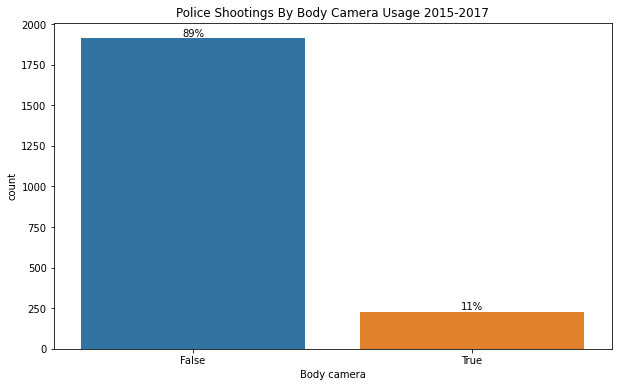

In [11]:
# Plot police shootings by body camera usage
plt.figure(figsize=(10, 6))

ax = sns.countplot(data = df_shootings, x = "body_camera")

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df_shootings)), (x.mean(), y), ha='center', va='bottom')

plt.xlabel("Body camera")
plt.title("Police Shootings By Body Camera Usage 2015-2017")
plt.show()

**Observation:**


*   Very low precentage of police officers used their camera's when shootings happened.




----

In [98]:
df_state_cameras = df_shootings.groupby("state").agg({'body_camera': 'mean'}).sort_values("body_camera",ascending=False)
df_state_cameras["body_camera"] = df_state_cameras["body_camera"] *100
df_state_cameras.head(5)

,body_camera
state,
VT,100.000000
UT,38.095238
ID,35.714286
DC,30.000000
AL,25.000000


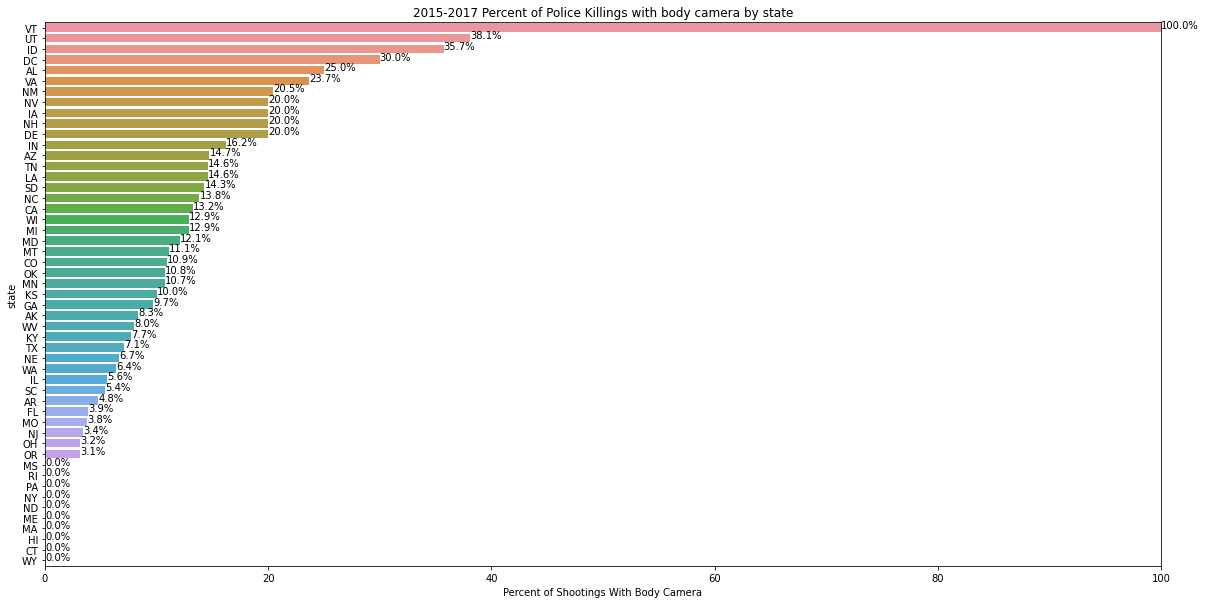

In [97]:
# Plot body cameras usage per state
plt.figure(figsize=(20,10))

ax = sns.barplot(y=df_state_cameras.index, 
            x=df_state_cameras["body_camera"]
            )

for rect in ax.patches:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    label = "{:.1f}%".format(x_value)
    plt.annotate(label,(x_value, y_value))     

plt.title("Percentage of Police Killings with body camera by state 2015-2017 ")
plt.xlabel("Percentage of Shootings With Body Camera")
plt.xlim([0, 100])
plt.show()

**Observation:**


*   Vermont state police officers used 100% procent their cameras, although during 2015-2017 years there were 3 shootings which is very low count comparing to other states. 
*   Top 3 states that had most shootings California,Texas and Florida have very low procentage of body camera usage which doesn't reach 14%.


----

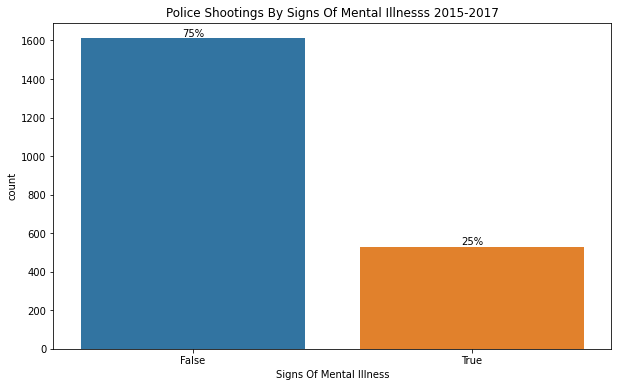

In [53]:
# Plot police shootings by victim signs of mental illnesss
plt.figure(figsize=(10, 6))

ax = sns.countplot(data = df_shootings, x = "signs_of_mental_illness")

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df_shootings)), (x.mean(), y), ha='center', va='bottom')

plt.xlabel("Signs Of Mental Illness")
plt.title("Police Shootings By Victim Signs Of Mental Illnesss 2015-2017")
plt.show()

**Observation:**


*   Most of killed people didn't have any mental illness.


----

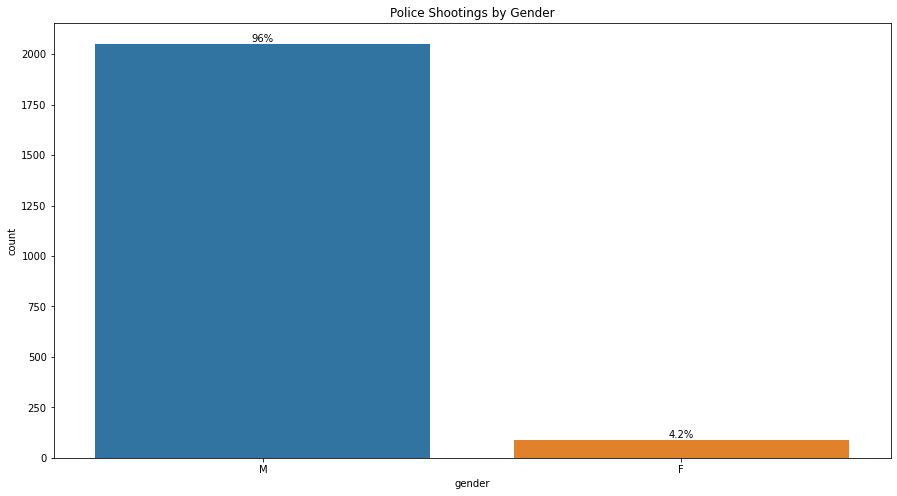

In [166]:
# Plot police shootings by gender
plt.figure(figsize=(15, 8))

ax = sns.countplot(data = df_shootings, x = "gender")

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df_shootings)), (x.mean(), y), ha='center', va='bottom')

plt.title("Police Shootings by Gender")
plt.show()

**Observation:**
- Most of victims were male. It's not very suprising because majority of crimes were done by males

----


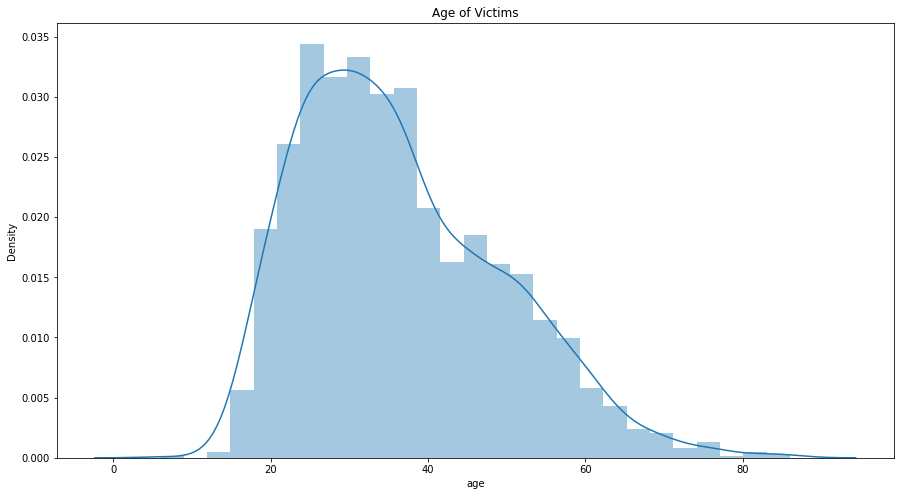

In [163]:
# Plot ages of shooted victims
plt.figure(figsize=(15, 8))

sns.distplot(df_shootings.age[~np.isnan(df_shootings["age"])])
plt.title("Age of Victims")
plt.show()

**Observation:**
- Most of the victims were between the ages of 20 and 40

----

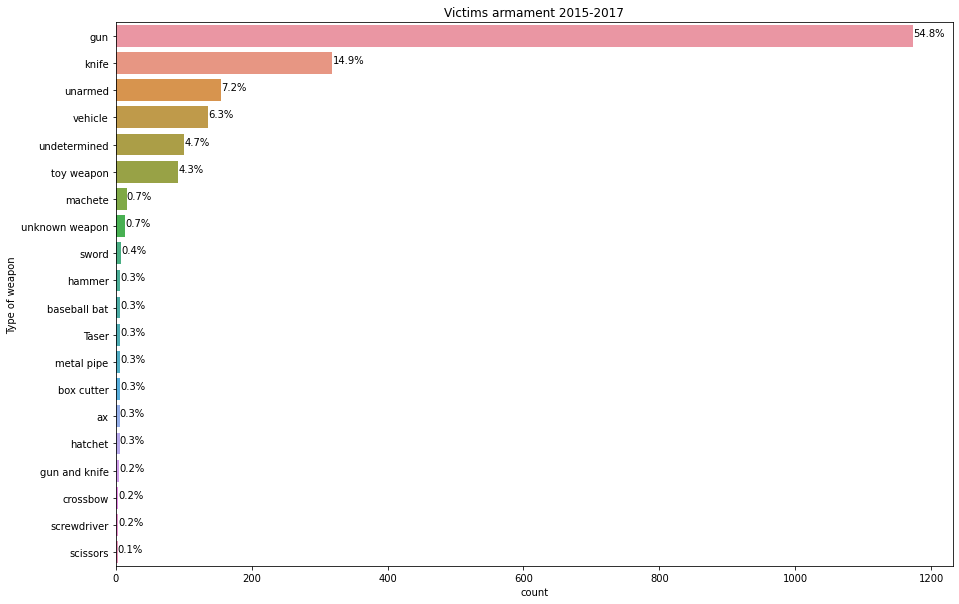

In [88]:
# Plot how victims were armed
plt.figure(figsize=(15, 10))

ax = sns.countplot(data = df_shootings, y = "armed",order = df_shootings.armed.value_counts().iloc[:20].index)

total = float(len(df_shootings))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.ylabel("Type of weapon")
plt.title("Victims armament 2015-2017")
plt.show()

**Observation:**


*   Most of victims were armed.
*   Unfortunately 7,2% wasn't armed, which is pretty high number and even ranked in third place.

----

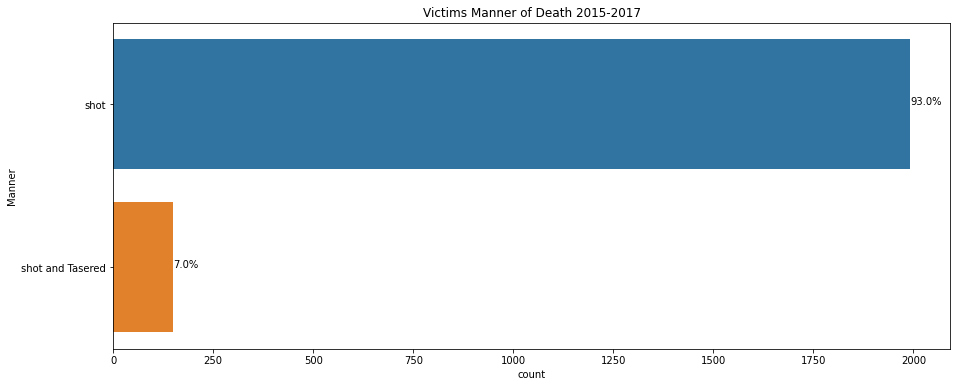

In [63]:
# Plot how victims were killed
plt.figure(figsize=(15, 6))

ax = sns.countplot(data = df_shootings, y = "manner_of_death")

total = float(len(df_shootings))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.ylabel("Manner")
plt.title("Victims Manner of Death 2015-2017")
plt.show()

**Observation:**
- Most victims died after being shot, although as we see 7% procent were shot and tasered. Which could mean that taser was used not as first defense measure.  Most likely because victims had a gun.  

----

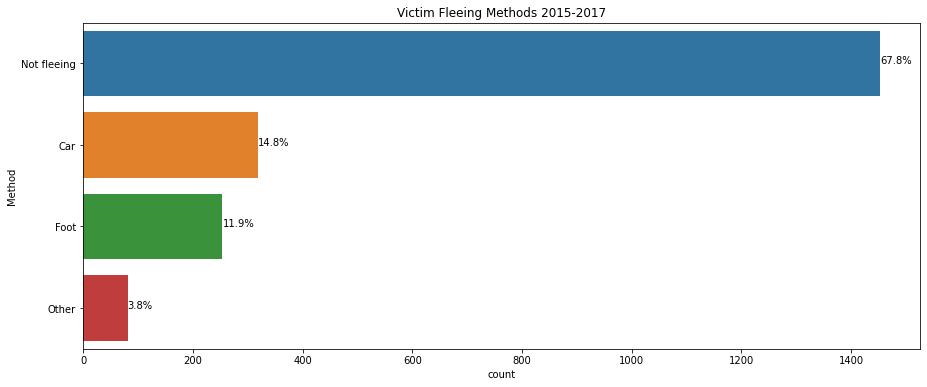

In [102]:
# Plot victims fleeing methods
plt.figure(figsize=(15, 6))

ax = sns.countplot(data = df_shootings, y = "flee")

total = float(len(df_shootings))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.ylabel("Method")
plt.title("Victim Fleeing Methods 2015-2017")
plt.show()

**Observation:**


*  Most victims haven't tried to flee, so majority tried to fight with police officers or at least tried to argue with them.

----

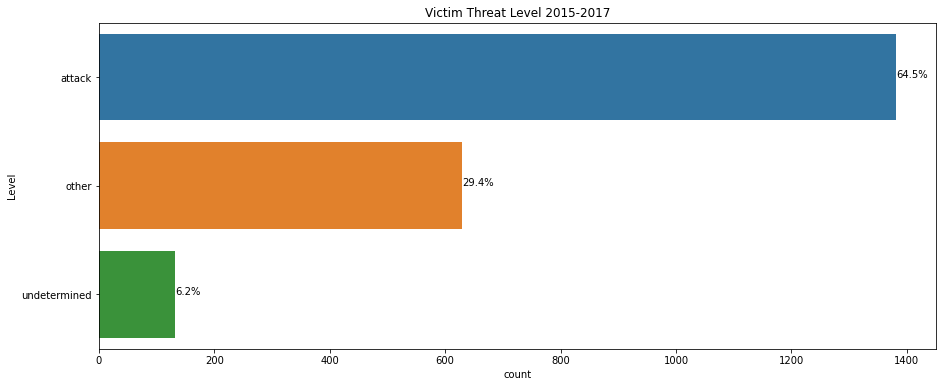

In [11]:
# Plot victim threat levels
plt.figure(figsize=(15, 6))

ax = sns.countplot(data = df_shootings, y = "threat_level")

total = float(len(df_shootings))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.ylabel("Level")
plt.title("Victim Threat Level 2015-2017")
plt.show()

**Observation:**


*   Even though majority of victims were attacking police officers, surprisingly 29,4% people threatening level was marked as Other and even 6,2% undetermined.




----

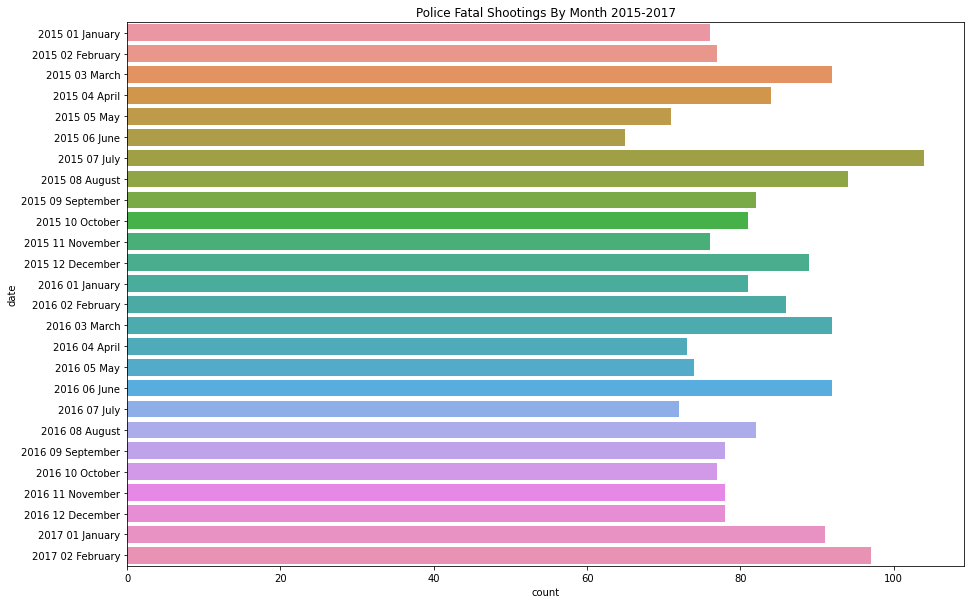

In [10]:
# Plot shootings by month
plt.figure(figsize=(15,10))

sns.countplot(y=df_shootings.index.strftime('%Y %m %B'), order=sorted(df_shootings.index.strftime('%Y %m %B').unique()))

plt.title("Police Fatal Shootings By Month 2015-2017")
plt.show()

**Observation:**

*   Shootings looks steady during the years, even though months shootings varies.


----

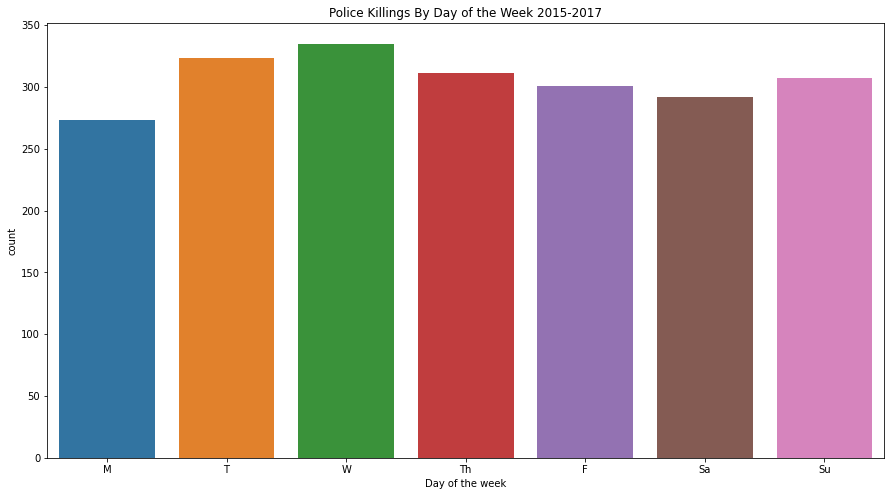

In [64]:
# Plot shootings by day of the week
days_dic={0:'M', 1:'T', 2:'W', 3:'Th', 4:'F', 5:'Sa', 6:'Su'}

plt.figure(figsize=(15,8))

sns.countplot(x=df_shootings.index.dayofweek.map(days_dic), order=days_dic.values())
plt.title("Police Killings By Day of the Week 2015-2017")
plt.xlabel("Day of the week")
plt.show()

**Observation:**


*  Surprisingly most victims were shot during Wednesday and less on Monday.


----

## Significance test between daily shootings

Already from our data we can start suspect that amount of shootings across the years doesn't change too much. Which leads to hypothesis that police fatal shootings is continuous process. To check that, we will use significance test between 2015 and 2016 years daily shootings distributions.

In [65]:
df_daily_15 = df_shootings["2015-01-01":"2015-12-31"].resample("D").count()["id"].value_counts().reset_index()
df_daily_15 = df_daily_15.rename(columns = {"index":"Shootings_per_day","id":"Shootings_count"})
df_daily_15 = df_daily_15.sort_values("Shootings_per_day")
df_daily_15 

,Shootings_per_day,Shootings_count
5,0,23
1,1,73
0,2,88
2,3,69
3,4,55
4,5,33
6,6,13
7,7,8
8,8,2


Text(0, 0.5, 'Density')

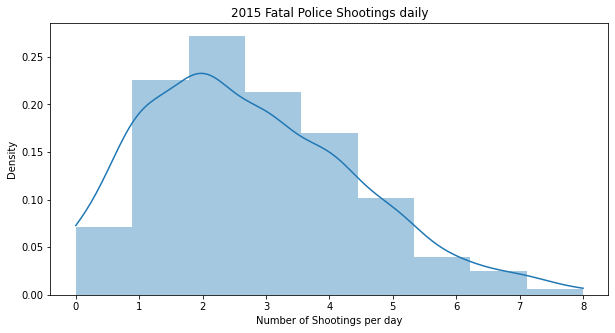

In [83]:
fig, ax =  plt.subplots(figsize=(10,5))

sns.distplot(df_shootings["2015-01-01":"2015-12-31"].resample("D").count()["id"],bins=9, kde_kws={'clip': (0.0, 8)}, ax=ax)

plt.title("2015 Fatal Police Shootings daily")
plt.xlabel("Number of Shootings per day")
plt.ylabel("Density")


In [87]:
 # Check skewed score
 st.skew(df_daily_15["Shootings_count"])

0.21437517224832478

In [89]:
df_daily_16 = df_shootings["2016-01-01":"2016-12-31"].resample("D").count()["id"].value_counts().reset_index()
df_daily_16 = df_daily_16.rename(columns = {"index":"Shootings_per_day","id":"Shootings_count"})
df_daily_16 = df_daily_16.sort_values("Shootings_per_day")
df_daily_16 

,Shootings_per_day,Shootings_count
5,0,26
1,1,76
2,2,75
0,3,86
3,4,60
4,5,27
6,6,10
7,7,4
8,8,2


Text(0, 0.5, 'Density')

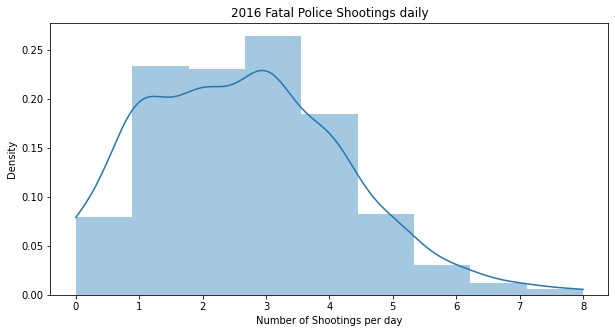

In [84]:
fig, ax =  plt.subplots(figsize=(10,5))

sns.distplot(df_shootings["2016-01-01":"2016-12-31"].resample("D").count()["id"],bins=9, kde_kws={'clip': (0.0, 8)}, ax=ax)

plt.title("2016 Fatal Police Shootings daily")
plt.xlabel("Number of Shootings per day")
plt.ylabel("Density")

In [91]:
 # Check skewed score
 st.skew(df_daily_16["Shootings_count"])

0.15124969711134867

Boths histograms are showing that shootings is slightly positively skewed with lower than 0.22 skewed scores, therefore for simplicity we will assume that the data are close to normally distributed.

In [69]:
dic_daily_test = {"Year":["2015","2016"],
                  "Days":[df_shootings["2015-01-01":"2015-12-31"].resample("D").count().reset_index().shape[0],df_shootings["2016-01-01":"2016-12-31"].resample("D").count().reset_index().shape[0]],
                  "Mean":[df_shootings["2015-01-01":"2015-12-31"].resample("D").count()["id"].mean(), df_shootings["2016-01-01":"2016-12-31"].resample("D").count()["id"].mean()],
                  "Std":[df_shootings["2015-01-01":"2015-12-31"].resample("D").count()["id"].std(), df_shootings["2016-01-01":"2016-12-31"].resample("D").count()["id"].std()]
                  }
df_daily_statistic =  pd.DataFrame.from_dict(dic_daily_test)       
df_daily_statistic   

,Year,Days,Mean,Std
0,2015,364,2.722527,1.693429
1,2016,366,2.631148,1.600689


**Null hypothesis:**  mean_15(2015 daily shootings mean) - mean_16(2016 daily shootings mean) = 0\
**Alternative hypothesis:** mean_15(2015 daily shootings mean) - mean_16(2016 daily shootings mean) != 0

Because we have two approximately normally distributed but independent populations and population standard deviation is know therefore we will use z-test

In [71]:
mean_15 = df_daily_statistic.loc[0]["Mean"]
mean_16 = df_daily_statistic.loc[1]["Mean"]

q_15 = df_daily_statistic.loc[0]["Std"]
q_16 = df_daily_statistic.loc[1]["Std"]

n_15 = df_daily_statistic.loc[0]["Days"]
n_16 = df_daily_statistic.loc[1]["Days"]

means_diff = mean_15 - mean_16
SE = np.sqrt(q_15**2/n_15 + q_16**2/n_16)

z_statistic =  means_diff/SE
P_value = st.norm.sf(abs(z_statistic))*2

print(f"Standard error = {SE}\nZ statistic = {z_statistic}\nP value = {P_value }")

Standard error = 0.12197892781683914
Z statistic = 0.7491452267975335
P value = 0.45376967815748004


Since the P-value 0.453 is pretty high we can strongly non-reject our hypothesis that our distributions are the same. We can see that fatal shootings by police have not changed during 2015-2016 years.

----

Let's check if following two years had any significant changes.

In [157]:
# Count 2015 and 2016 per day of the year shootings
df_years_count = df_shootings["2015-01-02":"2015-12-31"].resample("D").count()["id"].cumsum().reset_index()
df_years_count = df_years_count.rename(columns={"id":"Year_15_count"}).drop(columns={"date"})
# Add two days values, by adding daily 3 everage shooting count, so we would have full year data
df_years_count = df_years_count.join(df_shootings["2016-01-01":"2016-12-31"].resample("D").count()["id"].cumsum().reset_index()["id"])
df_years_count = df_years_count.rename(columns={"id":"Year_16_count"})
df_years_count

,Year_15_count,Year_16_count
0,2,1
1,3,4
2,6,5
3,7,7
4,11,13
...,...,...
359,985,951
360,986,951
361,988,955
362,990,956


In [158]:
# Count 2017 and 2018 per day of the year shootings
df_17_shootings_count = df_full_shootings["2017-01-01":"2017-12-31"].resample("D").count()["id"].cumsum().reset_index()
df_17_shootings_count = df_17_shootings_count.rename(columns={"id":"Year_17_count"})
df_17_shootings_count = df_17_shootings_count.drop(columns={"date"})
df_18_shootings_count = df_full_shootings["2018-01-01":"2018-12-31"].resample("D").count()["id"].cumsum().reset_index()
df_18_shootings_count = df_18_shootings_count.rename(columns={"id":"Year_18_count"})
df_18_shootings_count = df_18_shootings_count.drop(columns={"date"})

df_years_count = df_years_count.join(df_17_shootings_count)
df_years_count = df_years_count.join(df_18_shootings_count)
df_years_count

,Year_15_count,Year_16_count,Year_17_count,Year_18_count
0,2,1,6,3
1,3,4,6,6
2,6,5,8,7
3,7,7,12,9
4,11,13,14,12
...,...,...,...,...
359,985,951,974,978
360,986,951,977,978
361,988,955,980,982
362,990,956,981,983


Text(0, 0.5, 'Shootings')

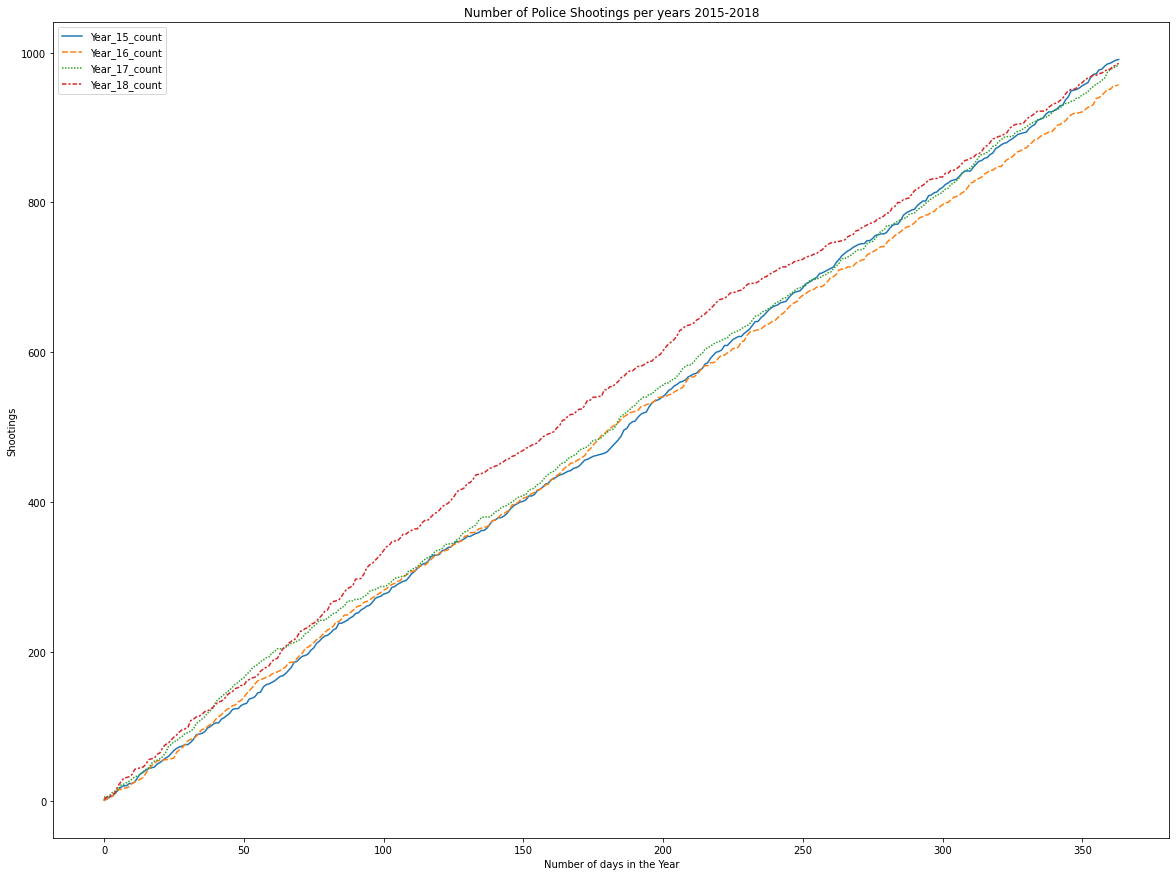

In [160]:
# Plot number of police shootings during years
fig, ax =  plt.subplots(figsize=(20,15))
sns.lineplot(data=df_years_count,ax=ax) 
plt.title("Number of Police Shootings per years 2015-2018")
plt.xlabel("Number of days in the Year")
plt.ylabel("Shootings")

As we can see even from 2015 to 2018 we didn't have any significant drops in shootings. Which leads to conclusion that situation wasn't changing for long time.

## Clustering observation

By observing our data we saw that there might be racial discrimination.Therefore we should check if our data could provide us any insightful racial biased clusters.

First we prepare our data: getting rid of Nan values, normalizing age variable  and encoding our categorical variables.

In [169]:
# Dropping NaN values
df_shootings_droped = df_shootings.dropna()
df_shootings_droped 

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
date,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-26,2382,James Leroy Marker,shot,gun,66.0,M,W,Floral City,FL,False,other,Car,False
2017-02-27,2378,Joey J. Bridges,shot,gun,27.0,M,W,Shelby,NC,True,attack,Foot,False
2017-02-27,2391,Shawn M. Igers,shot,gun,40.0,M,W,Corning,WI,False,attack,Not fleeing,False


In [170]:
# Apply min max scalar for age feature
scaler_minmax = MinMaxScaler()
scaled_minmax_age = scaler_minmax.fit_transform(df_shootings_droped[["age"]])

In [171]:
# Encode variables
df_encoded = df_shootings_droped.loc[:,"manner_of_death":"body_camera"].drop(columns="race")
df_encoded = pd.get_dummies(df_encoded).drop(columns="age")
df_encoded["age"] = scaled_minmax_age
df_encoded["signs_of_mental_illness"] = df_encoded["signs_of_mental_illness"].astype(int)
df_encoded["body_camera"] = df_encoded["body_camera"].astype(int)
df_encoded = df_encoded.fillna(0).reset_index().drop(columns="date")

In [172]:
# Encode days 
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    df_encoded[days[i]] = (df_shootings_droped.index.dayofweek == i).astype(float)
df_encoded 

,signs_of_mental_illness,body_camera,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Taser,armed_ax,armed_baseball bat,armed_baseball bat and fireplace poker,armed_baton,armed_bayonet,armed_bean-bag gun,armed_beer bottle,armed_blunt object,armed_box cutter,armed_brick,armed_carjack,armed_chain,armed_chain saw,armed_contractor's level,armed_cordless drill,armed_crossbow,armed_crowbar,armed_flagpole,armed_flashlight,armed_garden tool,armed_glass shard,armed_gun,armed_gun and knife,armed_guns and explosives,armed_hammer,armed_hand torch,armed_hatchet,armed_hatchet and gun,armed_knife,armed_lawn mower blade,armed_machete,armed_machete and gun,armed_meat cleaver,armed_metal hand tool,armed_metal object,...,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,age,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.610390,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.532468,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.220779,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.337662,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.779221,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1982,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.272727,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0.441558,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.246753,0.0,1.0,0.0,0.0,0.0,0.0,0.0


To visualize our clusters we will firstly make PCA. We will apply default PCA on our encoded features and check how much explained variance components represents. This will help us to better understand how many features we should use for later models and will let us decide which plot 3D or 2D plot we should choose to visualize our clusters.

In [253]:
pca = PCA().fit(df_encoded)

In [254]:
# Check how much each principal component explains variance
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

We can see that difference between two and three components is not that significant just about 3,9%. So it won't be a big difference if we will choose two instead of three components to represent our data. Other important note that 600 principal components explains 95% of our variance and later will be used for modeling our data.

In [17]:
# Perform PCA for visualizing our datapoints
pca_shootings = PCA(n_components=2)
pcomponents_shootings = pca_shootings.fit_transform(df_encoded)

In [18]:
df_shootings_pcs = pd.DataFrame(data = pcomponents_shootings, columns = ['principal component 1', 'principal component 2'])
df_shootings_pcs = df_shootings_pcs.join(df_shootings.reset_index()[["race"]])
df_shootings_pcs

,principal component 1,principal component 2,race
0,-0.579252,-0.665838,A
1,-0.669275,-0.318032,W
2,1.181825,-0.174040,H
3,0.044648,-0.688260,W
4,-0.155402,-0.320359,H
...,...,...,...
1981,0.419506,0.935638,W
1982,-0.668576,0.388348,O
1983,-0.683164,-0.303346,H
1984,-0.670872,-0.245067,W


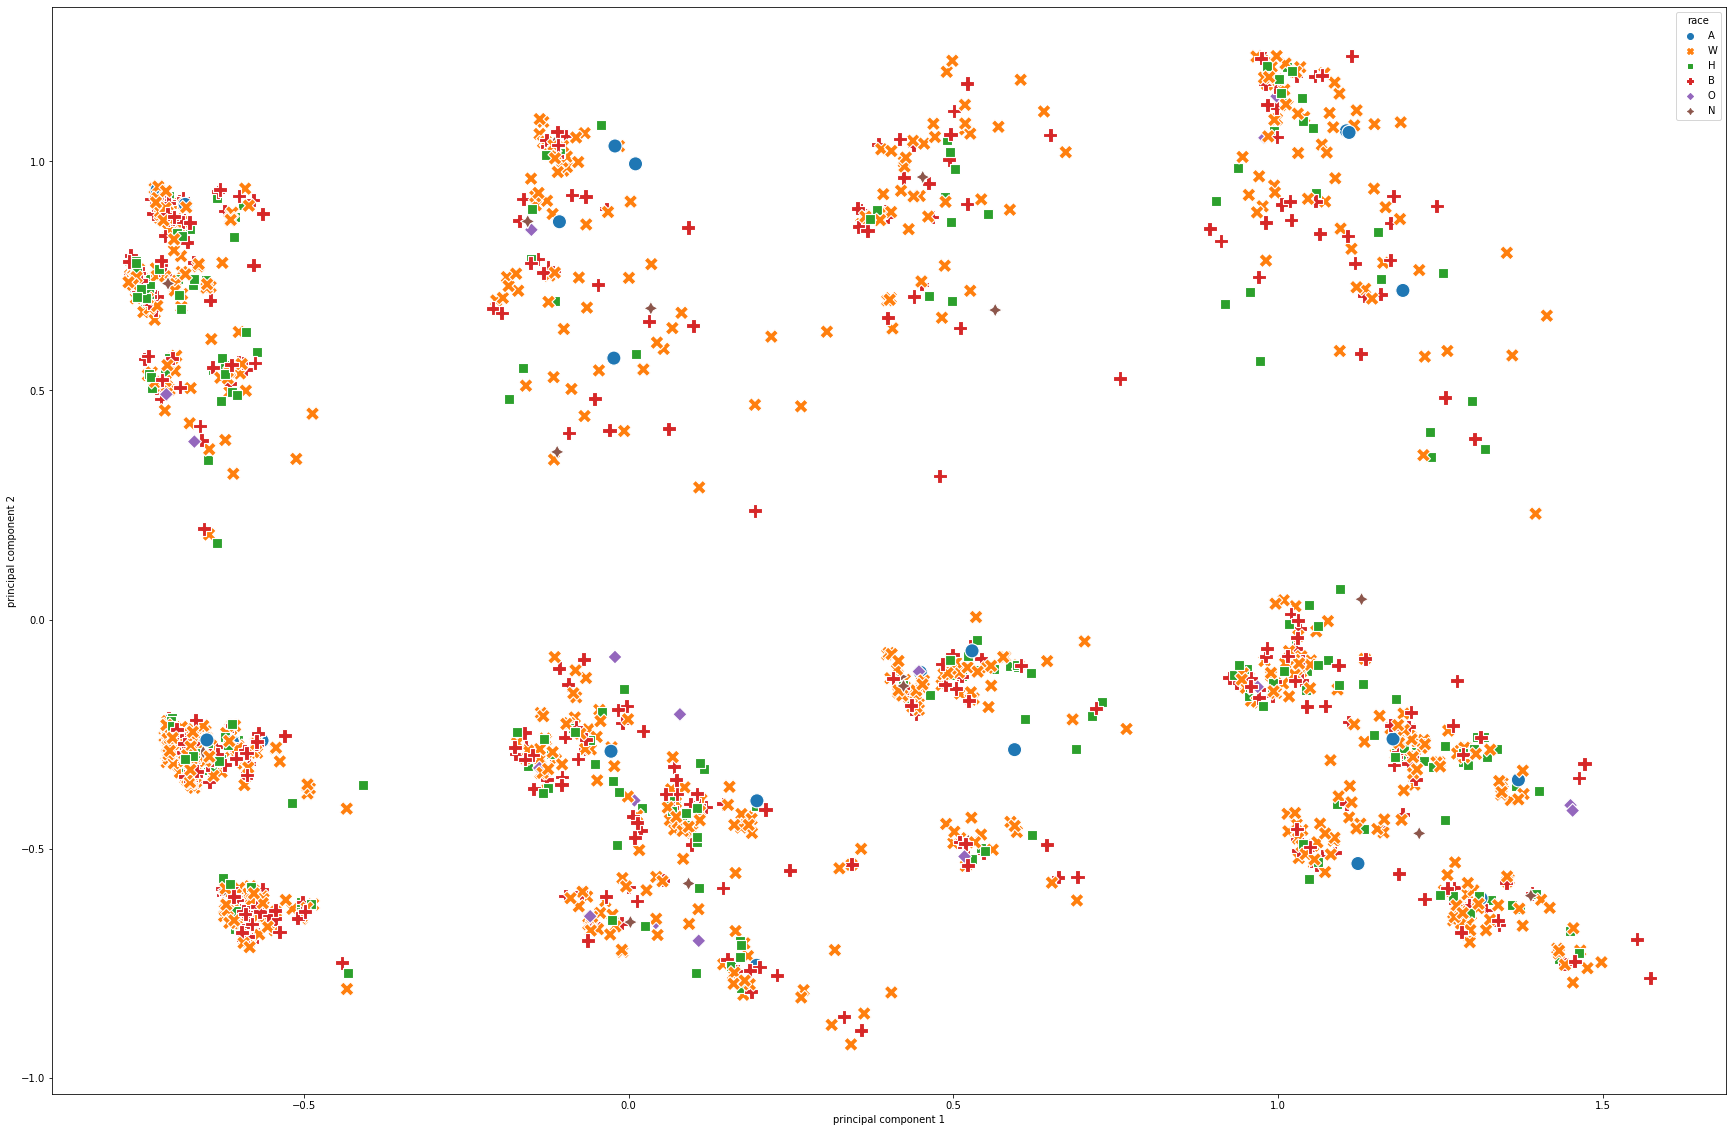

In [19]:
# Plotting two component PCA
fig, ax = plt.subplots(figsize=(30,20))

sns.scatterplot(data=df_shootings_pcs, x="principal component 1", y="principal component 2",hue="race", style="race",s=200)

From PCA we can see that many of our datapoints are overlapping, although it's because these 2 principal components explains just 18% variance, so it's not super accurate representation of how samples varies, but what we can see is that our races might be alarmingly very scattered.

Let's use TSNE and check if we could have a bit clearer distinction between our datapoints. 

In [173]:
# Perform T-SNE and check how much time it takes to perform
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_encoded)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1986 samples in 0.278s...
[t-SNE] Computed neighbors for 1986 samples in 11.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1986
[t-SNE] Computed conditional probabilities for sample 1986 / 1986
[t-SNE] Mean sigma: 0.705074
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.494164
[t-SNE] KL divergence after 300 iterations: 1.792384
t-SNE done! Time elapsed: 19.06910490989685 seconds


In [176]:
df_shootings_tsne = pd.DataFrame(data = tsne_results, columns = ['t-SNE 1', 't-SNE 2'])
df_shootings_tsne = df_shootings_tsne.join(df_shootings.reset_index()["race"]) 
df_shootings_tsne

,t-SNE 1,t-SNE 2,race
0,-11.767123,6.846987,A
1,-9.769724,5.438699,W
2,-3.694955,-14.836695,H
3,3.253136,13.917632,W
4,6.491596,10.340940,H
...,...,...,...
1981,11.749923,4.017784,W
1982,6.912799,0.303127,O
1983,-6.486920,3.178451,H
1984,0.530054,1.045326,W


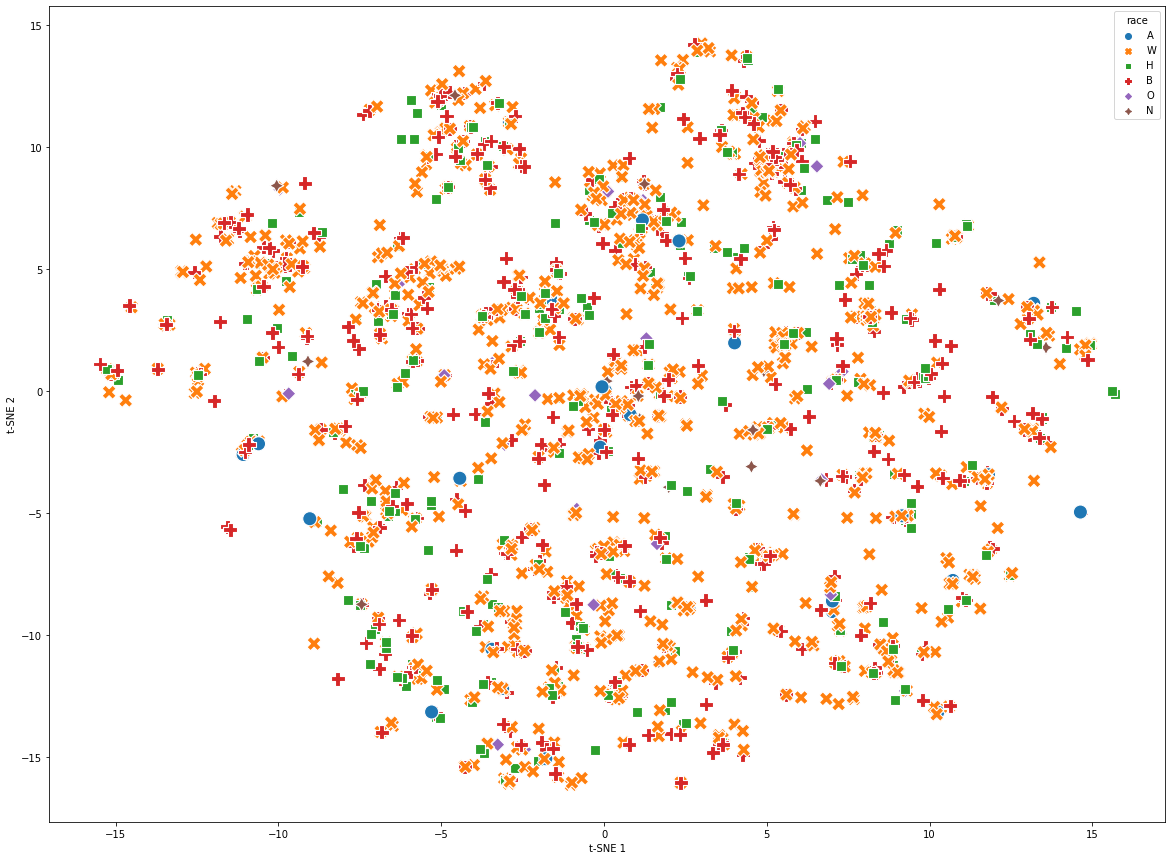

In [182]:
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(data=df_shootings_tsne, x="t-SNE 1", y="t-SNE 2", hue="race", style="race",s=200)


With T-SNE we get more distinctive look of how our samples differ. Unfortunately we still see that our races scatter all over the place.

Let's take PCA for our cluster visualization. Although before performing K-means clustering, we should check what would be optimal amount of clusters to use.

In [20]:
# Let's guess from 30 clusters
cluster_guess = 30

kmeans_kwargs = {  
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
# A list holds the SSE( the distance of points from the center  in our case ) values for each cluster count
sse = [] 

for k in range(1, cluster_guess):  
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs) 
  kmeans.fit(df_encoded)  
  sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center.

Text(0, 0.5, 'Sum Of Squared Errors')

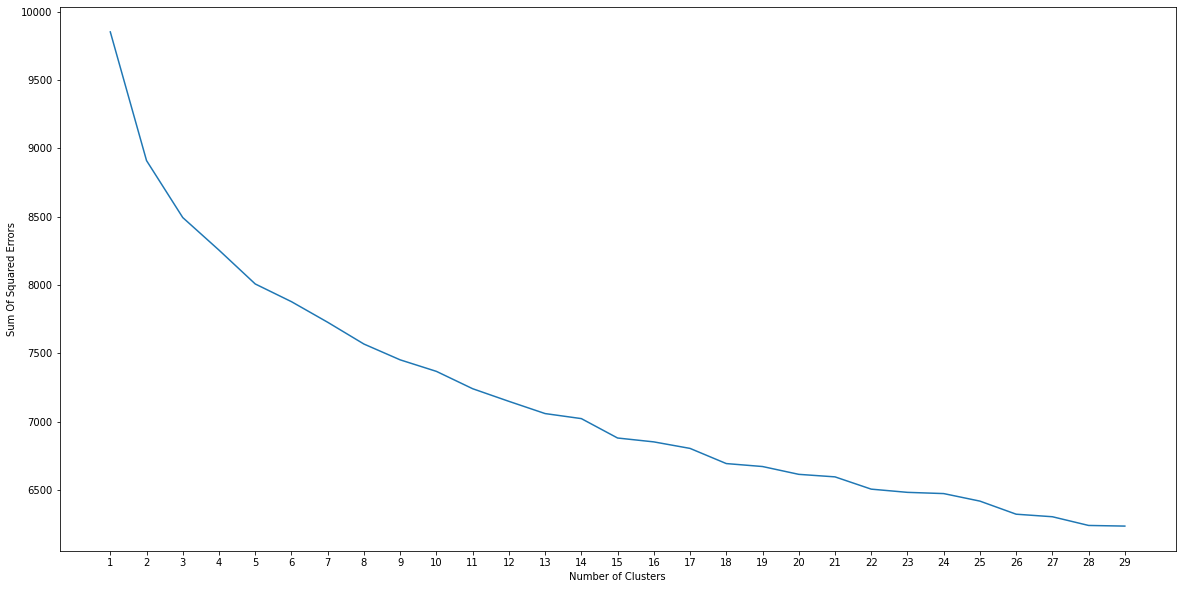

In [21]:
fig, axs = plt.subplots(figsize=(20, 10))
plt.plot(range(1, cluster_guess), sse)
plt.xticks(range(1, cluster_guess))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum Of Squared Errors")

In [22]:
# Pick cluster number when decrease in SSE is not sharp anymore. 
kl = KneeLocator(
    range(1, cluster_guess), sse, curve="convex", direction="decreasing"
    )

print(f'You should make {kl.elbow} clusters.')

You should make 8 clusters.


In [24]:
# Perfrom k-means with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(df_encoded)
k_labels = kmeans.labels_
k_labels

array([2, 2, 6, ..., 2, 2, 4], dtype=int32)

In [25]:
df_shootings_pcs["K-means clusters"] = k_labels
df_shootings_pcs

,principal component 1,principal component 2,race,K-means clusters
0,-0.579252,-0.665838,A,2
1,-0.669275,-0.318032,W,2
2,1.181825,-0.174040,H,6
3,0.044648,-0.688260,W,1
4,-0.155402,-0.320359,H,1
...,...,...,...,...
1981,0.419506,0.935638,W,5
1982,-0.668576,0.388348,O,4
1983,-0.683164,-0.303346,H,2
1984,-0.670872,-0.245067,W,2


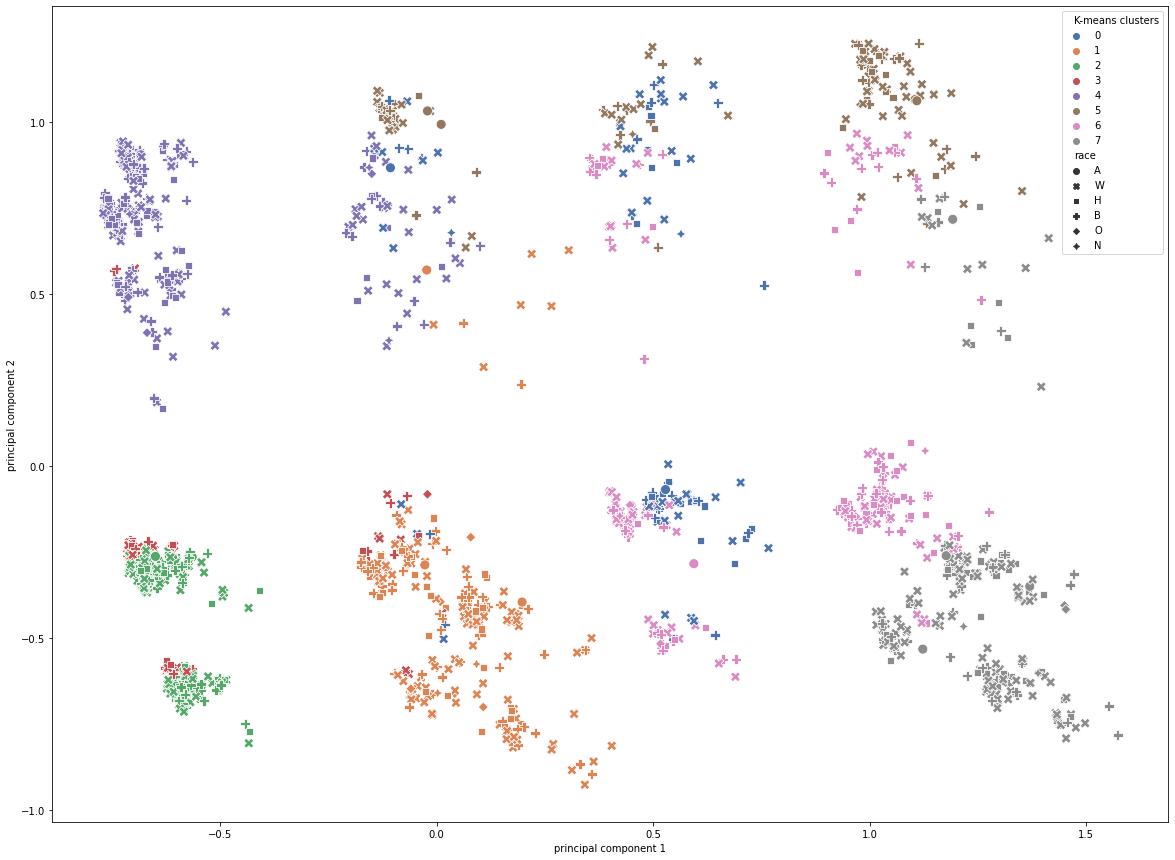

In [26]:
# Plot K-means clusters
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(ax=ax, data=df_shootings_pcs, x="principal component 1", y="principal component 2", hue="K-means clusters", style="race", palette="deep", s=100)

From this plot we can find that our assumption that races are very scattered is very likely to be true. Let's check how our races were distributed around all clusters.

In [31]:
df_clusters_shootings = pd.get_dummies(df_shootings_pcs["race"])
df_clusters_shootings = df_clusters_shootings.join(df_shootings_pcs["K-means clusters"])
df_clusters_shootings = df_clusters_shootings.groupby("K-means clusters").sum().reset_index() 
df_clusters_shootings 

,K-means clusters,A,B,H,N,O,W
0,0,2.0,21.0,23.0,2.0,0.0,49.0
1,1,4.0,61.0,41.0,2.0,6.0,115.0
2,2,8.0,135.0,79.0,8.0,7.0,297.0
3,3,1.0,40.0,22.0,1.0,1.0,53.0
4,4,3.0,94.0,71.0,3.0,5.0,149.0
5,5,4.0,31.0,18.0,3.0,2.0,72.0
6,6,2.0,64.0,40.0,4.0,3.0,112.0
7,7,5.0,54.0,45.0,3.0,3.0,127.0


In [35]:
df_clusters_race_shootings = df_clusters_shootings.loc[:,"K-means clusters":"W"]
df_clusters_race_shootings = df_clusters_race_shootings.melt(id_vars="K-means clusters").rename(columns=str.title)

Text(0, 0.5, 'Shootings Count')

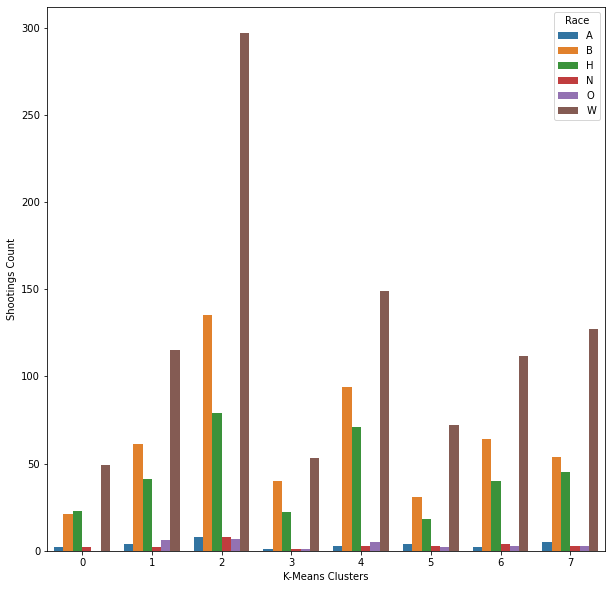

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data = df_clusters_race_shootings,x="K-Means Clusters", y="Value", hue="Variable", ax=ax)
plt.legend(title="Race")
plt.ylabel("Shootings Count")

From clusters distribution plot we can conclude that our data features can't provide very meaningful distinctions between races. All clusters have pretty much similar races distribution proportions. If we would compare our seperate clusters two paired points, we won't get very major distinctive differences. 

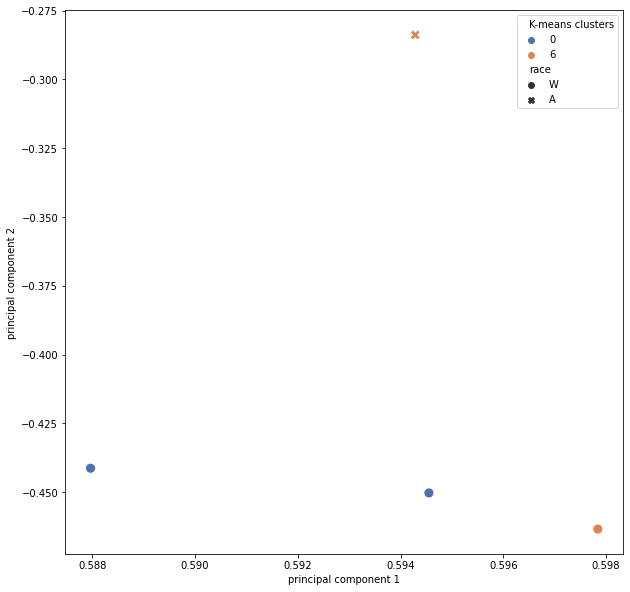

In [45]:
df_cluster_close = df_shootings_pcs[(df_shootings_pcs["principal component 1"] >=0.58) &
                                    (df_shootings_pcs["principal component 1"] <=0.6) &
                                    (df_shootings_pcs["principal component 2"] <=-0.2) &
                                    (df_shootings_pcs["principal component 2"] >=-0.5)]
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(ax=ax, data=df_cluster_close, x="principal component 1", y="principal component 2", hue="K-means clusters", style="race", palette="deep", s=100)

In [46]:
df_cluster_close

,principal component 1,principal component 2,race,K-means clusters
637,0.587964,-0.441331,W,0
987,0.594286,-0.283817,A,6
1429,0.597842,-0.463457,W,6
1768,0.594553,-0.450308,W,0


In [48]:
df_shootings.reset_index().iloc[[637,1768,987,1429], :]

,date,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
637,2015-08-23,769,Christopher Ray Tompkins,shot,gun,36.0,M,W,Arab,AL,False,attack,Car,False
1768,2016-10-19,1977,Frank J. Sandor,shot,vehicle,38.0,M,W,Willoughby,OH,False,undetermined,Car,False
987,2015-12-29,1134,Tien Hua,shot,unknown weapon,NaN,M,A,Rosemead,CA,False,undetermined,Not fleeing,False
1429,2016-06-13,1619,Joshua Sciscm,shot,gun,33.0,M,W,Schenectady,NY,False,attack,Not fleeing,False


In conclusion this dataset clustering doesn't provide any valuable information.
K-means clustering doesn't work well over categorical data because you need a distance between elements and that is not clear with categorical data  (especially if our data is not ordinal).

## Logistic regression findings

Even though we found that clustering didn't get any distinctive insights for our races, we should check if our features has connection with race and how well we can predict new values. For this task we will use logistic regression

First let's again check how police shootings by race are distributed.

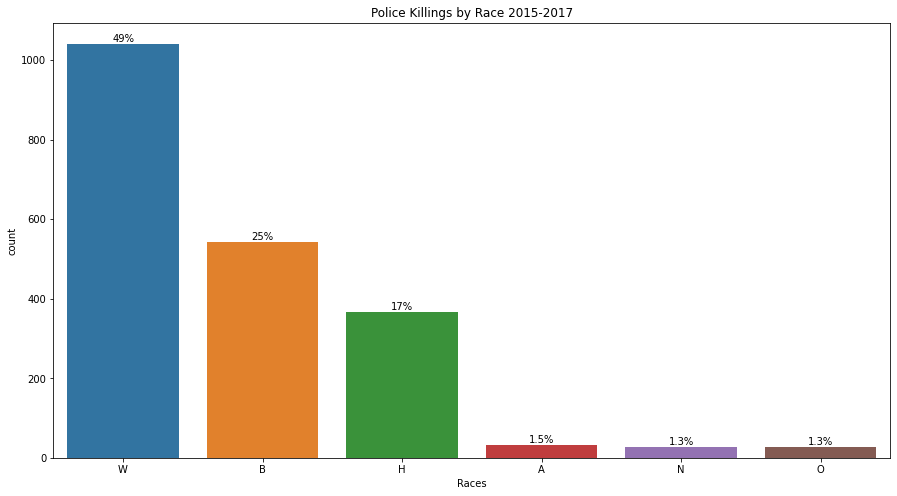

In [285]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="race", data=df_shootings, order = df_shootings["race"].value_counts().index)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df_shootings)), (x.mean(), y), ha='center', va='bottom')

plt.title("Police Killings by Race 2015-2017")
plt.xlabel("Races")
plt.show()

From this distribution we can see that, best fit for our model would be white race. That way our model will be balanced so it won't predict dominating class.

In [50]:
# Encoding race target
df_races_encoded = pd.get_dummies(df_shootings.reset_index().dropna()["race"])
df_races_encoded 

,A,B,H,N,O,W
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0
...,...,...,...,...,...,...
2137,0,0,0,0,0,1
2138,0,0,0,0,0,1
2139,0,0,0,0,0,1
2140,0,1,0,0,0,0


In [51]:
# Optimising our features with PCA
pca_feature_optimise = PCA(n_components=600)
optimised_features = pca_feature_optimise.fit_transform(df_encoded)

Let's split our distribution into two parts in a ratio of 80:20

In [52]:
X = optimised_features 
Y = df_races_encoded["W"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=5)

Perform logistic regression

In [53]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train,Y_train)

# Predict 20% of our data
Y_pred = logreg.predict(X_test)

In [54]:
# Make confusion matrix and to visualize how well our model performed.
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[127,  68],
       [ 62, 141]])

Text(0.5, 257.44, 'Predicted White Race')

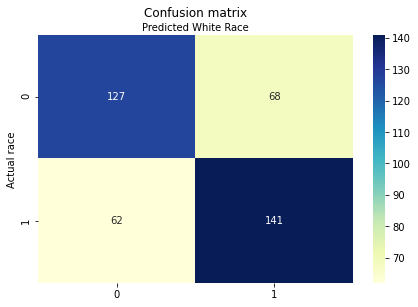

In [55]:
# Visualize confusion matrix
class_names=[0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual race')
plt.xlabel('Predicted White Race')

Looks like our model performed quite well. Let's find its accuracy score

In [56]:
score = logreg.score(X_test, Y_test)

print("Accuracy:", score)

Accuracy: 0.6733668341708543


We can see that our model can predict with 66% accuracy, which is not super low and get us in thinking that there might be relationship between our features and dependant variable. Before making quick assumtions let's test how our model performs with 2018 year data.

In [58]:
df_18_shootings = df_full_shootings["2018-01-01":"2018-12-31"].dropna()

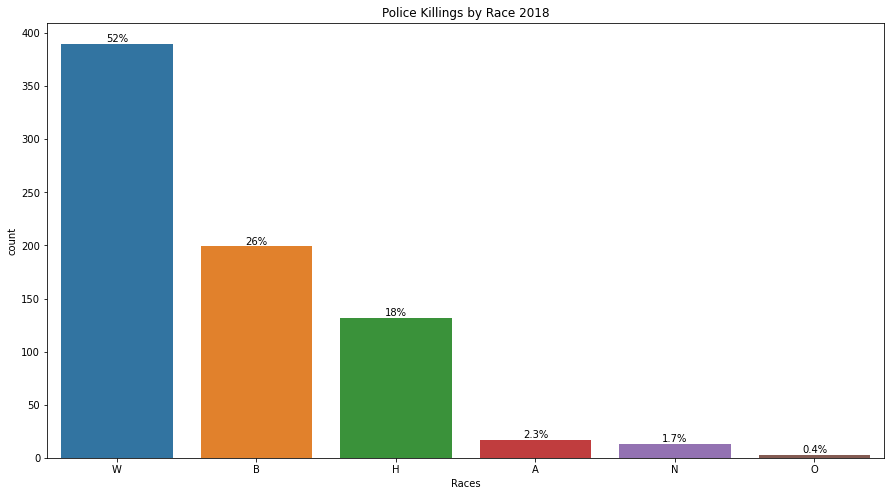

In [59]:
# Plot 2018 data 
plt.figure(figsize=(15,8))
ax = sns.countplot(x="race", data=df_18_shootings, order = df_18_shootings["race"].value_counts().index)

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2g}%'.format(100.*y/len(df_18_shootings)), (x.mean(), y), ha='center', va='bottom')

plt.title("Police Killings by Race 2018")
plt.xlabel("Races")
plt.show()

In [62]:
# Encode 2018 year data
scaled_minmax_age_18 = scaler_minmax.fit_transform(df_18_shootings[["age"]])

df_18_encoded = df_18_shootings.loc[:,"manner_of_death":"body_camera"].drop(columns=["race",])
df_18_encoded = pd.get_dummies(df_18_encoded).drop(columns="age")
df_18_encoded["age"] = scaled_minmax_age_18
df_18_encoded["signs_of_mental_illness"] = df_18_encoded["signs_of_mental_illness"].astype(int)
df_18_encoded["body_camera"] = df_18_encoded["body_camera"].astype(int)
df_18_encoded = df_18_encoded.fillna(0).reset_index().drop(columns="date")
df_18_encoded

,signs_of_mental_illness,body_camera,manner_of_death_shot,manner_of_death_shot and Tasered,armed_BB gun,armed_Taser,armed_ax,armed_baseball bat,armed_baton,armed_bow and arrow,armed_box cutter,armed_chain,armed_crossbow,armed_gun,armed_gun and car,armed_gun and knife,armed_gun and vehicle,armed_hatchet,armed_incendiary device,armed_knife,armed_machete,armed_metal pipe,armed_metal pole,armed_pellet gun,armed_pick-axe,armed_piece of wood,armed_pipe,armed_pole,armed_pole and knife,armed_samurai sword,armed_screwdriver,armed_sharp object,armed_straight edge razor,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,armed_vehicle and gun,...,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_SC,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other,age
0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.724638
1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.724638
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.217391
3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.492754
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.739130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0.420290
750,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.434783
751,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.304348
752,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.434783


In [63]:
# Optimising our features with PCA
pca_feature_optimise_18 = PCA(n_components=600)
optimised_features_18 = pca_feature_optimise.fit_transform(df_18_encoded)

In [64]:
# Encode race target
df_races_encoded_18 = pd.get_dummies(df_18_shootings.reset_index().dropna()["race"])

In [65]:
# Get 2018 year prediction score
score = logreg.score(optimised_features_18, df_races_encoded_18["W"])

print("Accuracy:", score)

Accuracy: 0.519893899204244


Even though we saw that 2018 year data were distributed quite the same as 2015-2017 data, we lower score, but still not significantly low that we could say that there are no relationship between race and our features. Additionaly we can perfrom multinomial linear regression and check it's score.

In [68]:
X = optimised_features 
Y = df_shootings.reset_index().dropna()["race"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs',class_weight = 'balanced')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [69]:
print(f"Accuracy {model.score(X_test, Y_test)} %")

Accuracy 0.542713567839196 %


Multinomial regression score is not very low(considering that it's multinomial) and leads to conclusion that there is small relationship between victim death circumstances  and what his race was. Therefore there are specific circumstances were people with certain race can be shooted a bit more likely than other races.

## Issues and propositions

So from our data we saw that fatal shootings was happening not at random. There are couple of main issues which improvement could gratefully change situation:
 - Fatal shootings is racialy biased.
 - Police doesn't use body camera's.
 - Police shots too much unarmed or fakely armed people. 
 - Some states had significant more shootings than other states.

Starting with first issue. It's very difficult topic which contains actually many topics in itself. Although probably the biggest one is **poverty**. According to 2017 [data](https://www.kff.org/other/state-indicator/poverty-rate-by-raceethnicity/?dataView=0&currentTimeframe=2&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D) the highest poverty rate by race is found among **Native Americans 26.2%**, with **Blacks 22.9%** having the second highest poverty rate, and **Hispanics** (of any race) having the third highest poverty rate **19.3%**. **Whites** had a poverty rate of **9.6%**, while **Asians** had a poverty rate at **11.2%**. 

We could argue if poverty is mother of crime, but it definitely has remarkable [impact](https://www.arcgis.com/apps/MapJournal/index.html?appid=5508484140a84023a1e2d8b080e14d0a). It correlates with our fatal shootings data and crimes numbers from FBI data.

**Solution:**

We could probably think of many solutions although I would go with giving poorer living people easier access to education. \
 - "[Research shows](https://www.federalreserve.gov/newsevents/speech/yellen20141017a.htm) that children from lower-income households who get good-quality pre-Kindergarten education are more likely to graduate from high school and attend college as well as hold a job and have higher earnings, and they are less likely to be incarcerated or receive public assistance."

Regarding second issue, as [research showed](https://www.repository.cam.ac.uk/bitstream/handle/1810/246429/JQC11.pdf?sequence=1&isAllowed=n) police uses less force with civilians when they have body cameras turned on. Although there other researches that argues that body cameras has minimal effect. As we found out from our data very little procent just 11% of police officers used body cameras and recorded actual shooting. 

**Solution**
- Do more experiments and see if body cameras actually work. As an example for one year make mandatory to record cameras every time police officers are called.

Third issue comes from over use of force. Gun might be used for extreme defense reasons,  although police officers should be trained to overcome these situations or use less extreme measures like paper spray or taser. 

**Solution:**
- Give more finanses for police defense training.
- Strenghten legal frameworks to combat over use of gun power.

Regarding fourth issue as we saw some states have significant more shootings per population which could be related with significant high criminal rates. Although what we additionaly noticed that the top ranked states had very week gun laws. No single law will stop all crime, that’s not how laws work. But the evidence points to gun safety laws working to curb gun violence.

**Solution:**
-  States with top ranks in crimes per population and weak gun laws could impose additional gun restrictions.

**Short propositions conclusion:** \
For long term number one proposition should be to increase funding in education. It would require big slice of US budget and would take many years to see significant results, but it is one of the key elements which could greatly reduce poverty and criminal rates for upcoming generations. For quicker and less costly solutions we could use all the remaining solutions.
